# Chapter 25 - Exercises

In [14]:
from statistics import stdev
import scipy.stats as stats
import math

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use("ggplot")

In [52]:
def degrees_freedom(s1, n1, s2, n2):
    """
    Calculate degrees freedom for a two-sample $t$-test under assumptions of unequal variances.
    """
    n = (s1 ** 2 / n1 + s2 ** 2 / n2) ** 2
    d = (1 / (n1 - 1)) * (s1 ** 2 / n1) ** 2 + (1 / (n2 - 1)) * (s2 ** 2 / n2) ** 2
    return n / d

In [31]:
template = """
se: {}
df: {}
t: {}
P-value: {}
"""

## 25.1 

### Answers

* a) randomly assign hens to each of the two groups; apply treatment to one, and nothing (or placebo) to the other, making the second group the control; put a secondary blind (on the researchers) in place at both the application and evaluation stages; compare the results across the two groups, using a two-sample t-test
* b) for each hen, measure egg production during a set period; after this period, apply the treatment, and measure egg production for a second set time period; use the difference in production for each hen to perform a matched-pairs t-test
* c) matched pairs factors in variability in egg production across hens

## 25.3

### Answers

* a) design two versions of adds for many products - one with and one without sexual images; for each subject, randomly assign half plain ads and half ads with sexual content; for each subject, compare the difference in the subject's ability to remember the products for ads with and without sexual images; 
* b) use the same set of ads as in b, but divide subjects into two groups: those that will see the plain ads, and those that will see the ads with sexual images;  record the ability to remember products for each subject, and compare the mean values across subjects in the two groups;

## 25.5

### Answers

* a) Because the same 19 cities are compared before and after some period of time, this calls for a paired t-test.
* b) The test generated a P-value of 0.0244.  As a result, we should reject the null hypothesis; the evidence supports the claim that there was a significant difference in LFPR between the two timeframes.

## 25.7

### Answers

* a) Paired $t$-test: each consecutive set of Fridays is a pair
* b) P-value is 0.021 => reject H0: There is a significant decrease in traffic on Friday the 13ths.
* c) Dates appear (?) randomly selected; may not be independent, though, given that largely the same traffic would cross on any given day (even across year+month).

## 25.9

### Answers

* $\sqrt{SD^2(local) + SD^2(online)}$ would be correct if the two sets were independent; each is a pair, so the independence doesn't hold.

## 25.11

### Answers

* a) the histogram; it shows the variability of the _difference_; the boxplot masks that difference
* b) different drivers (good vs. bad) might have large differences in premiums; meanwhile, the online vs local difference for any _single_ driver will probably not be quite so big
* c) the distribution of differences appears "nearly normal"; randomly selected; 2 measurements should be paired

## 25.13

### Answers

* see below; no - can't reject H0; the evidence doesn't support a claim of a significant difference

In [13]:
# H0: mu(local - online) = 0
# HA: mu(local - online) < 0  # assuming he wants to show that local prices are better... ?

n = 10
ybar = 45.9
s = 175.663

se = s / math.sqrt(n)
df = n - 1
t = ybar / se
pvalue = 1 - stats.t.cdf(t, df=df)

print(template.format(se, df, t, pvalue))


se: 55.5495180618158
df: 9
t: 0.8262897969505736
P-value: 0.21499981492405718



#### Assumptions Template

  - paired
  - groups are independent
  - randomization:
  - differences are nearly Normal

## 25.15

### Answers

* assumptions:
  - measurements are paired by city over time
  - groups are independent (at least the cities are far enough apart to be independent enough for our purposes)
  - randomization: not clear that these cities are random, but presumably representative of their overall geographic region
  - differences are unimodal, not highly skewed, no clear outliers
* We are 90% confident that the average mean difference in temperature between July and January for these European cities is captured by the range from 32.3 to 41.3 degrees F.

In [25]:
#!cat ../data/Temperatures.txt

data = pd.read_table("../data/Temperatures.txt", index_col="City")
data['diff'] = data.July - data.Jan
data.head()

,Jan,July,diff
City,,,
Vienna,34,75,41
Copenhagen,36,72,36
Paris,42,76,34
Berlin,35,74,39
Athens,54,90,36


In [26]:
data.describe()

,Jan,July,diff
count,12.000000,12.000000,12.000000
mean,40.583333,77.416667,36.833333
std,9.110018,7.982462,8.663752
min,21.000000,65.000000,22.000000
25%,35.750000,72.750000,32.750000
50%,41.000000,75.500000,36.000000
75%,44.750000,84.750000,40.250000
max,54.000000,90.000000,55.000000


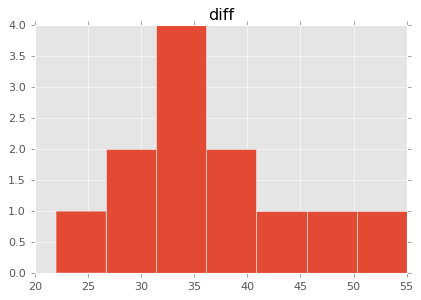

In [27]:
data.hist('diff', bins=7);

In [35]:
n = data['diff'].size
y = data['diff'].mean()
s = data['diff'].std()

se = s / math.sqrt(n)
df = n - 1
t = stats.t.ppf(0.95, df=df)

print("n: {}, y: {}, s: {}".format(n, y, s))

print(template.format(se, df, t, "na"))

(y - t * se, y, y + t * se)

n: 12, y: 36.833333333333336, s: 8.663752423783015

se: 2.501009897031698
df: 11
t: 1.7958848187036691
P-value: na



(32.34180762782648, 36.833333333333336, 41.32485903884019)

## 25.17

### Answers

* two-sample t-test -- not paired data
* (1.6295823781073686, 7.333333333333332, 13.037084288559296)

In [38]:
#!cat ../data/Push-ups_1.txt
data = pd.read_table("../data/Push-ups_1.txt")
data.head()

,Boys,Girls
0,17,24
1,27,7
2,31,14
3,17,16
4,25,2


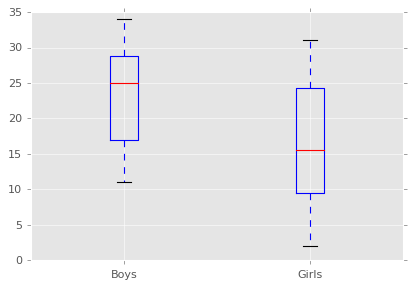

In [46]:
plt.boxplot([data.Boys, data.Girls], labels=["Boys", "Girls"]);

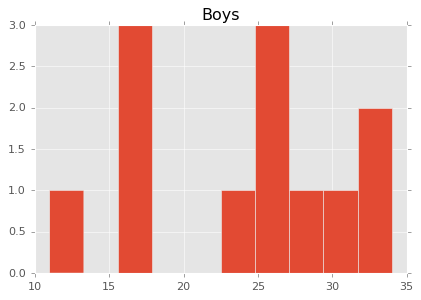

In [47]:
data.hist("Boys");

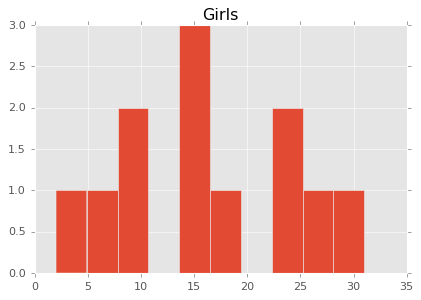

In [49]:
data.hist("Girls");

In [53]:
nb = data.Boys.size
yb = data.Boys.mean()
sb = data.Boys.std()

ng = data.Girls.size
yg = data.Girls.mean()
sg = data.Girls.std()

diff = yb - yg
se = math.sqrt(sb ** 2 / nb + sg ** 2 / ng)
df = degrees_freedom(sb, nb, sg, ng)

t = stats.t.ppf(0.95, df=df)

(diff - se * t, diff, diff + se * t)

(1.6295823781073686, 7.333333333333332, 13.037084288559296)

## 25.19

### Answers

* a) paired t-test: 
    - paired samples
    - groups (i.e. workers) are independent
    - randomly selected
    - "approximately" normal
* b) 
    - H0: mu(diff) = 0
    - HA: mu(diff) > 0
    - given P-value = 0.003, reject H0 - evidence support claim of positive difference
* c) Type I
* d) todo

In [66]:
#!cat ../data/Job_satisfaction.txt
data = pd.read_table("../data/Job_satisfaction.txt", index_col="Worker")
data['diff'] = data.After - data.Before
data.head()

,Before,After,diff
Worker,,,
1,34,33,-1
2,28,36,8
3,29,50,21
4,45,41,-4
5,26,37,11


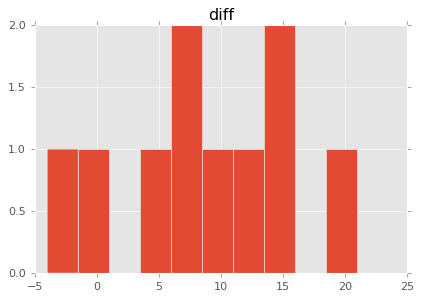

In [68]:
data.hist('diff');

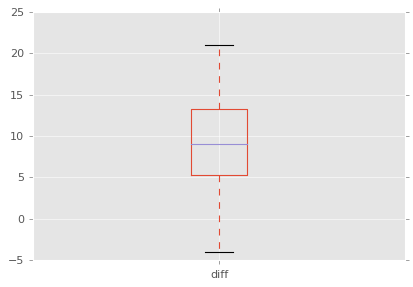

In [69]:
data.boxplot('diff');

In [72]:
n = data['diff'].size
y = data['diff'].mean()
s = data['diff'].std()

print("avg diff: {}".format(y))

se = s / math.sqrt(n)
t = y / se
df = n - 1
pvalue = 1 - stats.t.cdf(t, df=df)

print(template.format(se, t, df, pvalue))

avg diff: 8.5

se: 2.362907813126304
df: 3.5972626408788515
t: 9
P-value: 0.0028864646690407447



## 

### Answers

* 


## 

### Answers

* 


## 

### Answers

* 
